In [1]:
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings("ignore")

In [2]:
df_daily = pd.read_csv("../data/archive 2/salesdaily.csv")

In [3]:
df_daily.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

In [4]:
df_daily.shape

(2106, 13)

In [5]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Selected group of drugs from the dataset (57 drugs) is classified to the following Anatomical Therapeutic Chemical (ATC) Classification System categories:

    M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
    M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
    N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
    N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
    N05B - Psycholeptics drugs, Anxiolytic drugs
    N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
    R03 - Drugs for obstructive airway diseases
    R06 - Antihistamines for systemic use
    Sales data are resampled to the hourly, daily, weekly and monthly periods. Data is already pre-processed,    where processing included outlier detection and treatment and missing data imputation.


In [6]:
df_daily.describe()

M01AB        M01AE        N02BA        N02BE         N05B  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      5.033683     3.895830     3.880441    29.917095     8.853627   
std       2.737579     2.133337     2.384010    15.590966     5.605605   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.340000     2.000000    19.000000     5.000000   
50%       4.990000     3.670000     3.500000    26.900000     8.000000   
75%       6.670000     5.138000     5.200000    38.300000    12.000000   
max      17.340000    14.463000    16.000000   161.000000    54.833333   

              N05C          R03          R06         Year        Month  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      0.593522     5.512262     2.900198  2016.401235     6.344255   
std       1.092988     6.428736     2.415816     1.665060     3.386954   
min       0.000000     0.000000     0.000000  2014.000000     1.000000   
25%       0.000000     1.000000     1.000000  2015.000000     3.000000   
50%       0.000000     4.000000     2.000000  2016.000000     6.000000   
75%       1.000000     8.000000     4.000000  2018.000000     9.000000   
max       9.000000    45.000000    15.000000  2019.000000    12.000000   

              Hour  
count  2106.000000  
mean    275.945869  
std       1.970547  
min     190.000000  
25%     276.000000  
50%     276.000000  
75%     276.000000  
max     276.000000

In [7]:
df_daily.set_index(df_daily["datum"], inplace = True)
df_daily.index = pd.to_datetime(df_daily.index)


In [8]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 230.3+ KB


In [9]:
df_daily.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  \
datum                                                                           
2014-01-02  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014   
2014-01-03  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014   
2014-01-04  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014   
2014-01-05  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014   
2014-01-06  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014   

            Month  Hour Weekday Name  
datum                                 
2014-01-02      1   248     Thursday  
2014-01-03      1   276       Friday  
2014-01-04      1   276     Saturday  
2014-01-05      1   276       Sunday  
2014-01-06      1   276       Monday

In [10]:
d_codes = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
drug_codes = {'Antirheumatic' : ['M01AB','M01AE'],
             'Analgesics' : ['N02BA','N02BE'],
             'Psycholeptics' : ['N05C','N05B'],
             'Airway diseases': ['R03'],
             'Antihistamines': ['R06']}

In [11]:
for x,y in drug_codes.items():
    print(x,y)

Antirheumatic ['M01AB', 'M01AE']
Analgesics ['N02BA', 'N02BE']
Psycholeptics ['N05C', 'N05B']
Airway diseases ['R03']
Antihistamines ['R06']


In [12]:
import matplotlib.pyplot as plt
# Visualizing time series in Python
# 1. Line graph with matplotlib pyplot module
def plot_series(data, title, d_code, freq):

    fig = plt.figure(figsize = (12, 8))
    plt.title(title)
    for d in d_code:
        #df[d].plot()
        plt.plot(data.index, data[d].resample(freq).sum())
    
    plt.show()

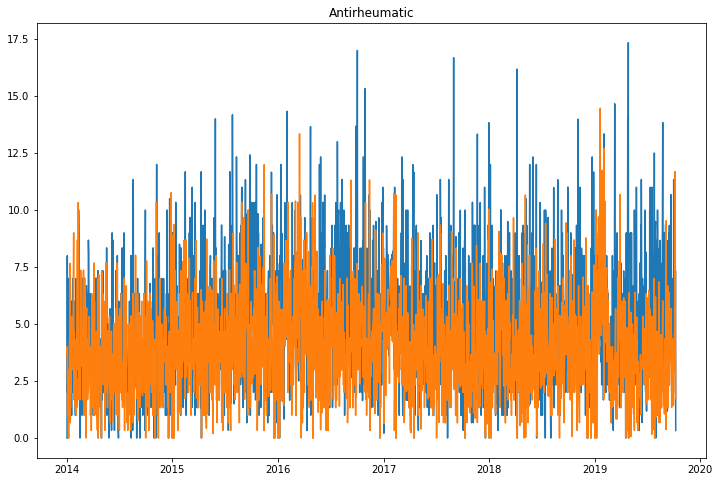

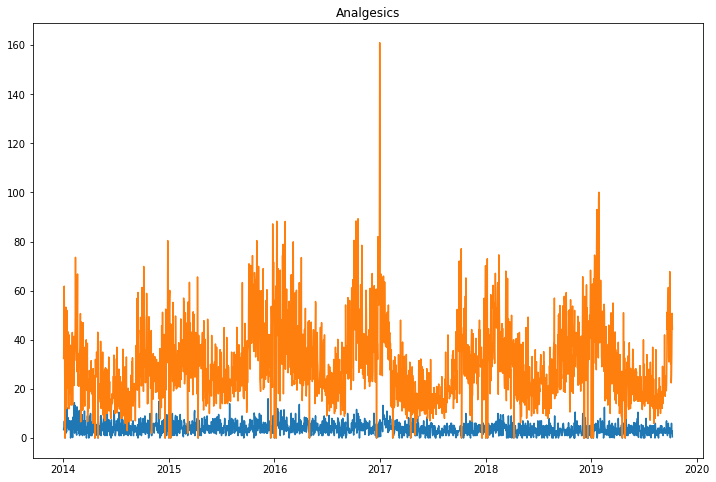

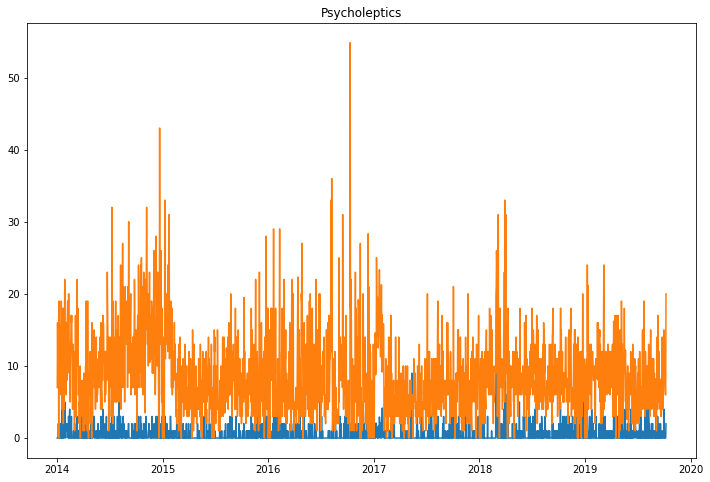

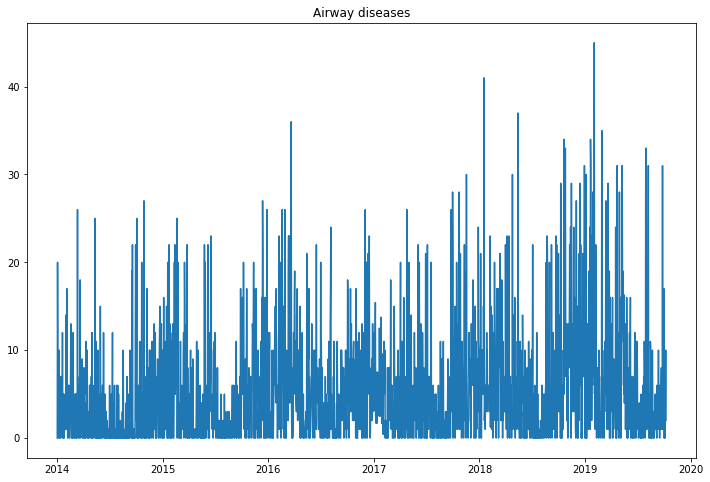

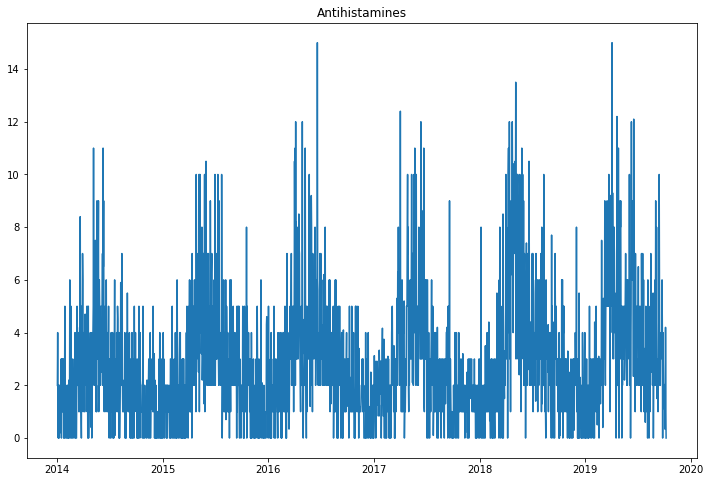

In [13]:
for x,y in drug_codes.items():
    plot_series(df_daily, x, y, 'D')

Seasonality present in Analgesics and Antihistamines.                  

Let's look at the trend for each of the drug categories for 365 days

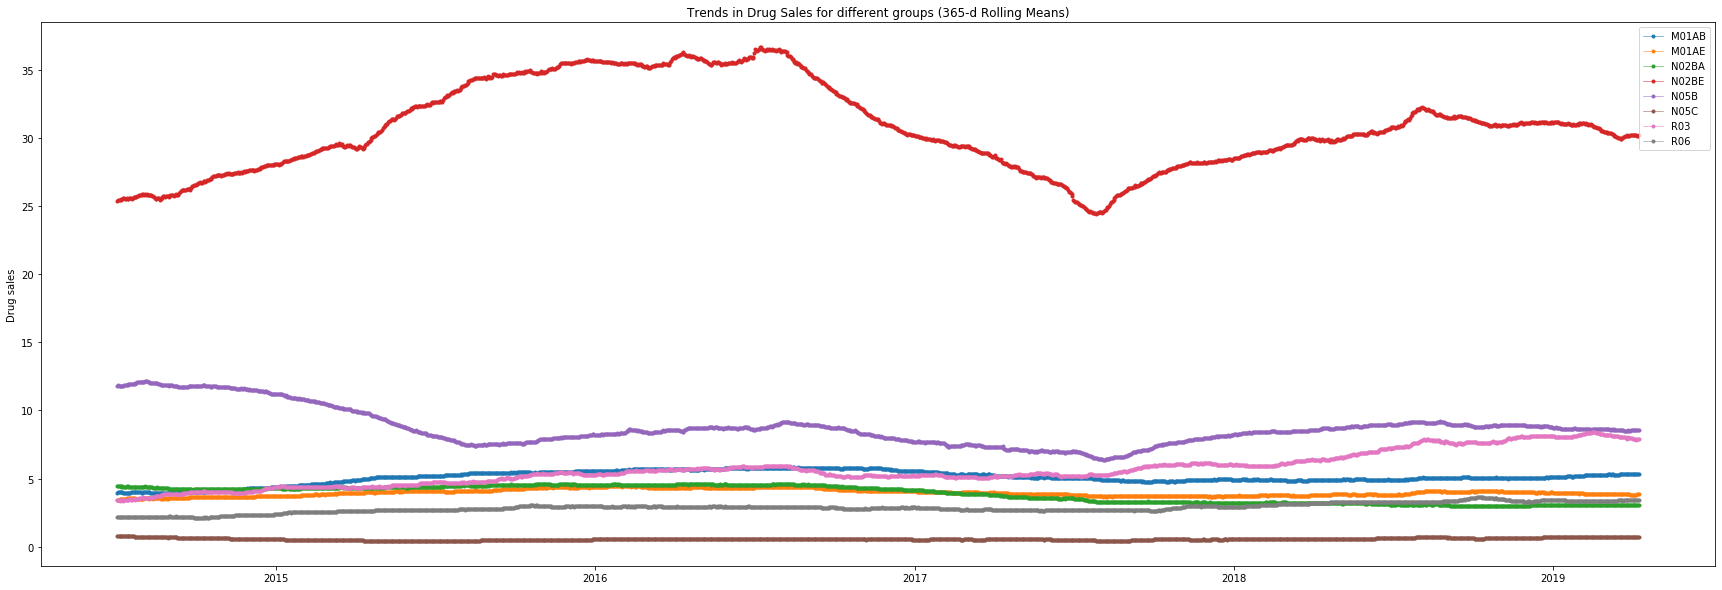

In [14]:

df_365 = df_daily[d_codes].rolling(window=365, center=True).mean()

fig, ax = plt.subplots(figsize=(30, 10))
for nm in d_codes:
    ax.plot(df_365[nm], label=nm, marker='.', linestyle='-', linewidth=0.5)
    ax.legend()
    ax.set_ylabel('Drug sales')
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)');

Exploring trend and seasonality for 'R06'

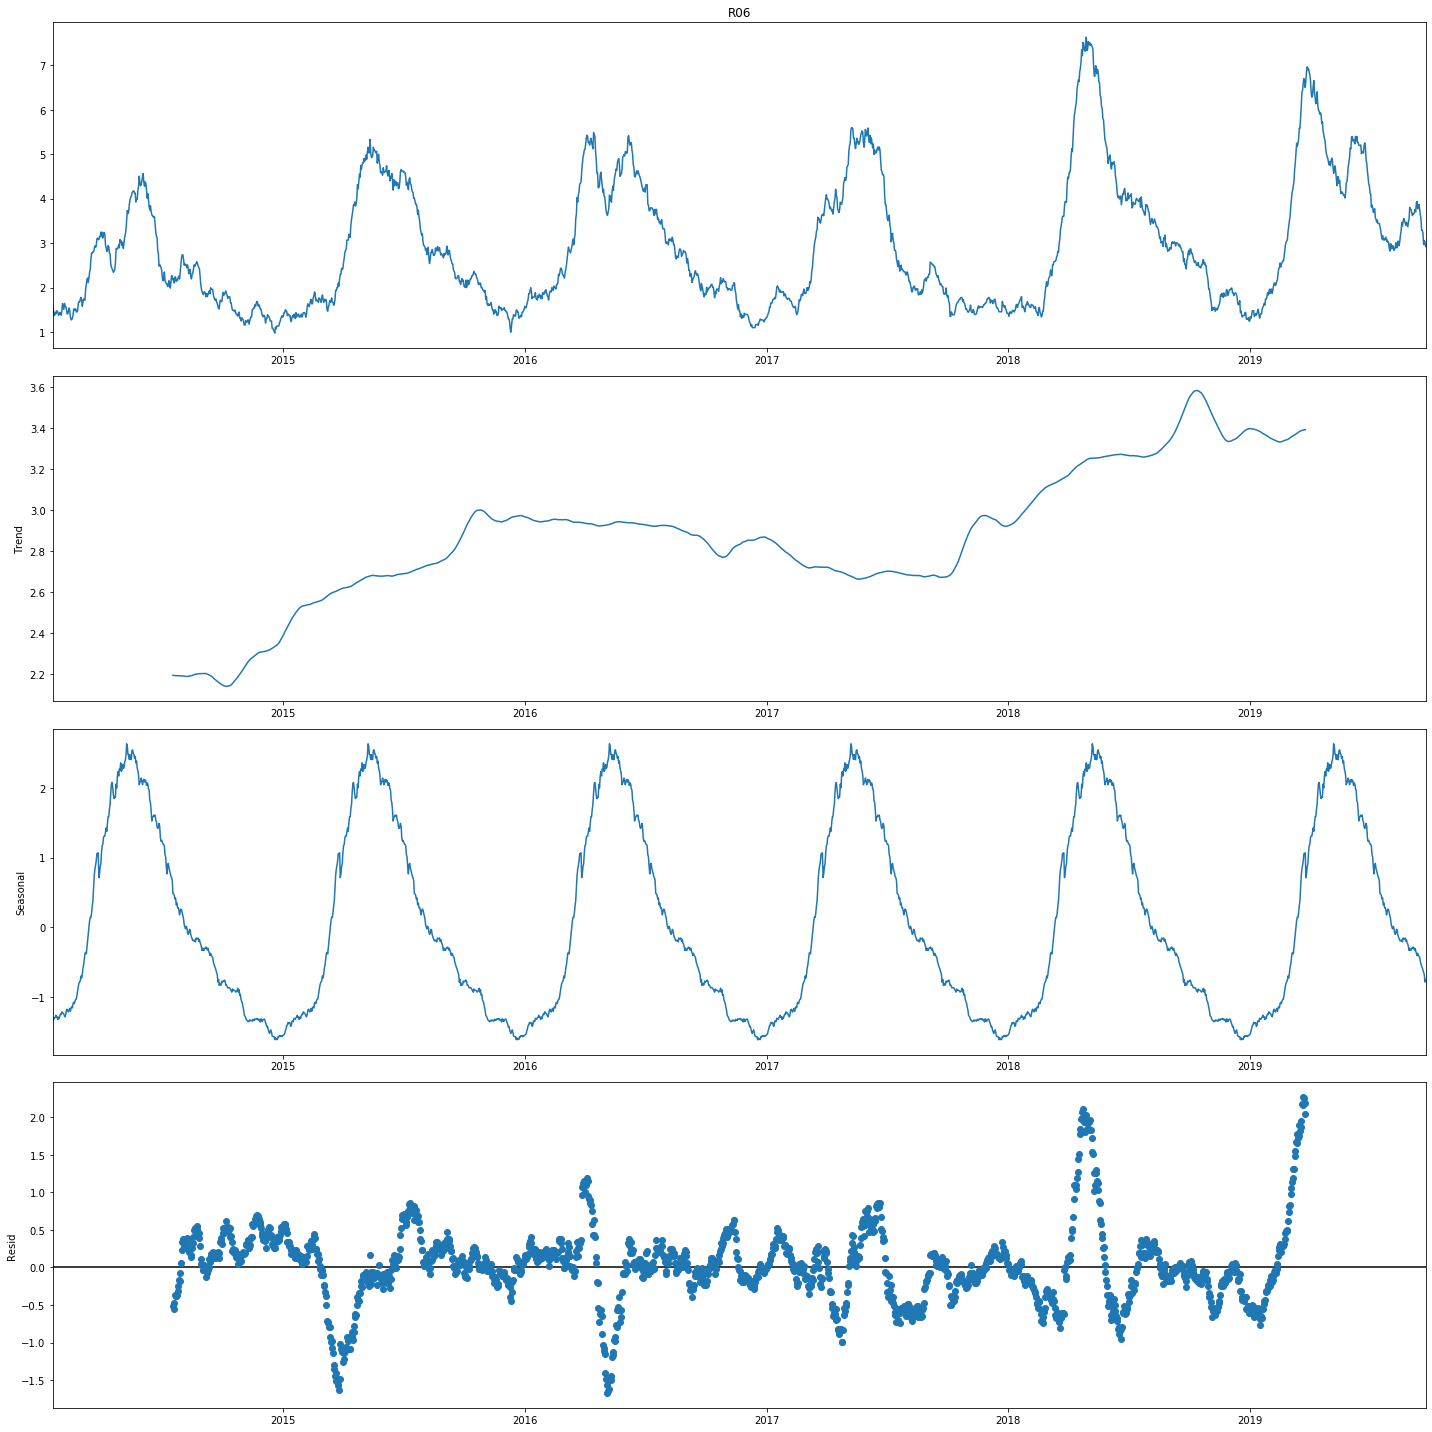

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_daily['R06'].rolling(30, center=True).mean().dropna(), freq=365, filt=None)
plt.rcParams["figure.figsize"] = (20,20)
result.plot()
plt.show()

Seasonal decompose is used for analysis of each component. This is useful when determining residuals in data, based on decomposed data. Higher the residuals, lower the predictability.

In [16]:

df_weekly = pd.read_csv("../data/archive 2/salesweekly.csv")
for x in d_codes:
    result = seasonal_decompose(df_weekly[x], freq=52, model='additive')
    dfs = pd.concat([result.trend, result.seasonal, result.resid, result.observed], axis=1)
    dfs.columns = ['trend', 'seasonal', 'residuals', 'observed']
    dfs=dfs.dropna()
    res=dfs['residuals'].values
    obs=dfs['observed'].values
    resmean=np.mean(np.abs(res))
    obsmean=np.mean(np.abs(obs))
    perc=resmean*100/obsmean
    print(x+' RESMEAN:'+str(resmean)+', OBSMEAN:'+str(obsmean)+', PERC:'+str(perc)+'%')

M01AB RESMEAN:5.26715996284115, OBSMEAN:35.59490833332001, PERC:14.797509558159527%
M01AE RESMEAN:4.319542609675869, OBSMEAN:28.00801458336, PERC:15.422523423856601%
N02BA RESMEAN:3.9228389592521657, OBSMEAN:27.083016, PERC:14.484498178682042%
N02BE RESMEAN:29.534357236963668, OBSMEAN:217.6597028336, PERC:13.569051529737028%
N05B RESMEAN:12.94840305932125, OBSMEAN:61.96614999972, PERC:20.895929566997072%
N05C RESMEAN:2.0384606385595405, OBSMEAN:3.871833333332, PERC:52.648460382081936%
R03 RESMEAN:11.722244335544508, OBSMEAN:40.06845833336, PERC:29.25554119906046%
R06 RESMEAN:4.278758416393868, OBSMEAN:19.744589999960002, PERC:21.67053565762842%


In [19]:
#Convert the data to monthly
df_monthly = df_daily.resample('1M').sum()

In [20]:
df_monthly.shape

(70, 11)

In [21]:
df_monthly.head()

M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06  \
datum                                                                       
2014-01-31  127.69   99.090  152.100   878.030  354.0  30.0  112.0   48.2   
2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2   
2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4   
2014-04-30  113.10   89.475  125.150   698.500  209.0  18.0   97.0   73.7   
2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7   

             Year  Month  Hour  
datum                           
2014-01-31  60420     30  8252  
2014-02-28  56392     56  7728  
2014-03-31  62434     93  8556  
2014-04-30  60420    120  8280  
2014-05-31  62434    155  8556

In [22]:
df_monthly.index = pd.to_datetime(df_monthly.index)

Test for stationarity 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


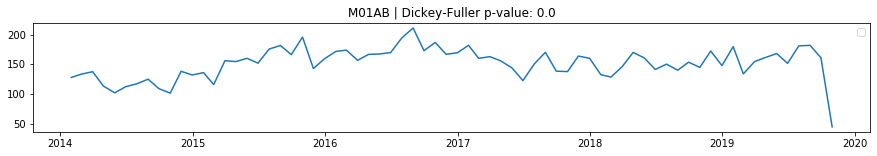

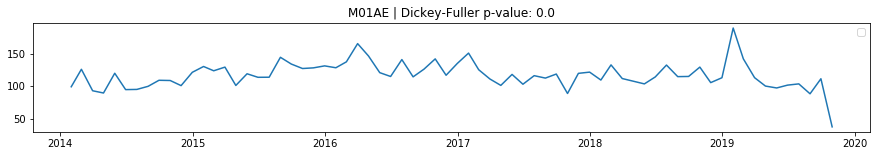

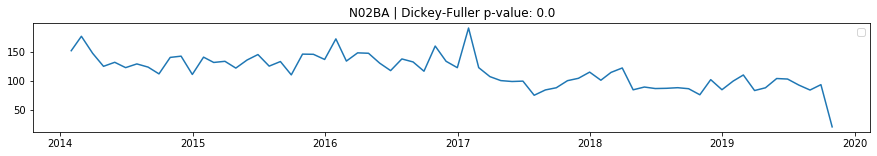

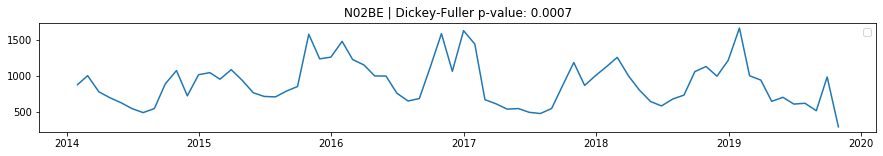

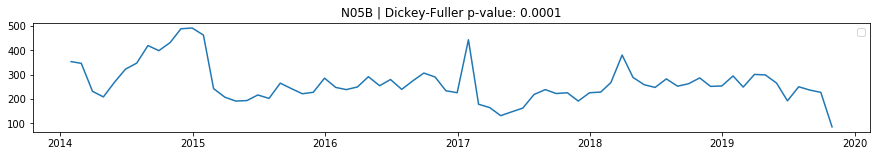

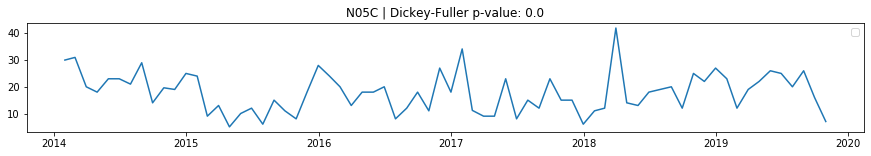

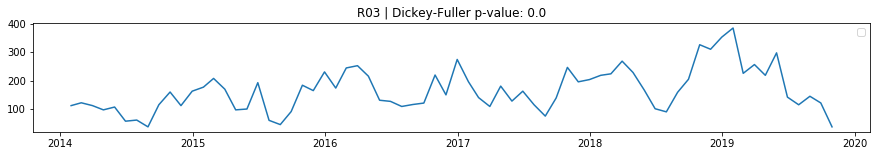

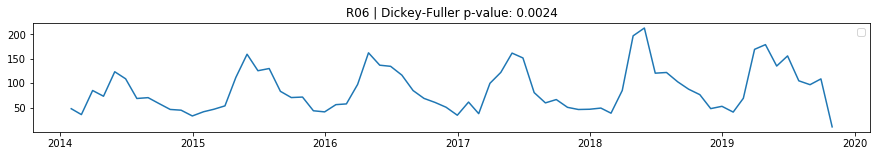

In [17]:
from statsmodels.tsa.stattools import adfuller

for code in d_codes:
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(15,2))
    ax.set_title('{} | Dickey-Fuller p-value: {}'.format(code ,round(adfuller(df_daily[code])[1], 4)))
    index = df_daily[code].resample('M').sum().index
    plt.plot(index, df_daily[code].resample('M').sum())
    plt.legend();

p-value for all drugs < 0.05 from adfuller test. So it is safe to assume that the data is stationary.      
We see seasonality for R06.  
Let's plot the monthly plot for R06 to see the peak sale months

In [ ]:
R06_monthly = pd.Series((df_monthly.R06).values,
                     index = pd.date_range('2014-01-31',
                                           periods = 70,
                                           freq = 'M'))

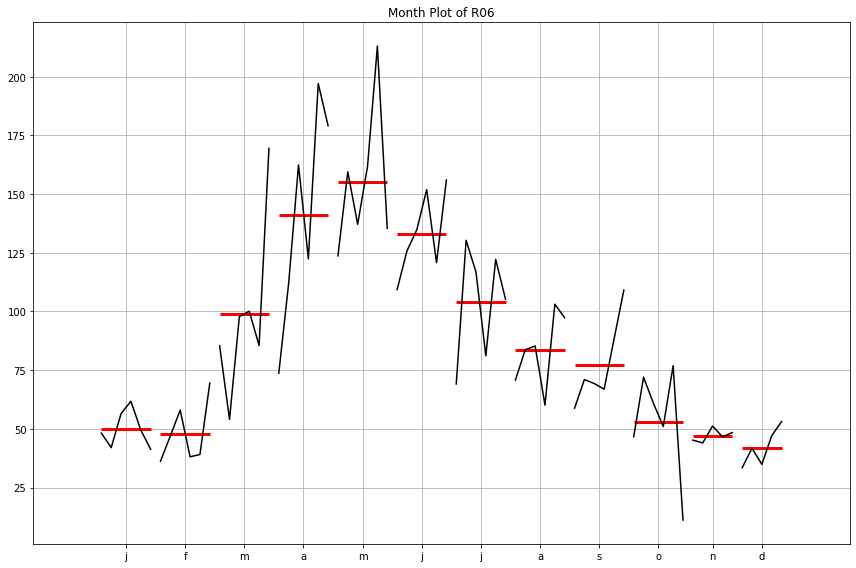

In [25]:
# Month plot
from statsmodels.graphics.tsaplots import month_plot

# Month_plot() requires the data to have a monthly (12 or 'M') frequency
# Alternative: quarter_plot() for dataset with a frequency of 4 or 'Q'
fig, ax1 = plt.subplots(1, 1, figsize = (12,8))
month_plot(R06_monthly, ax = ax1)
plt.title("Month Plot of R06")
plt.grid(axis = 'both')
plt.tight_layout()

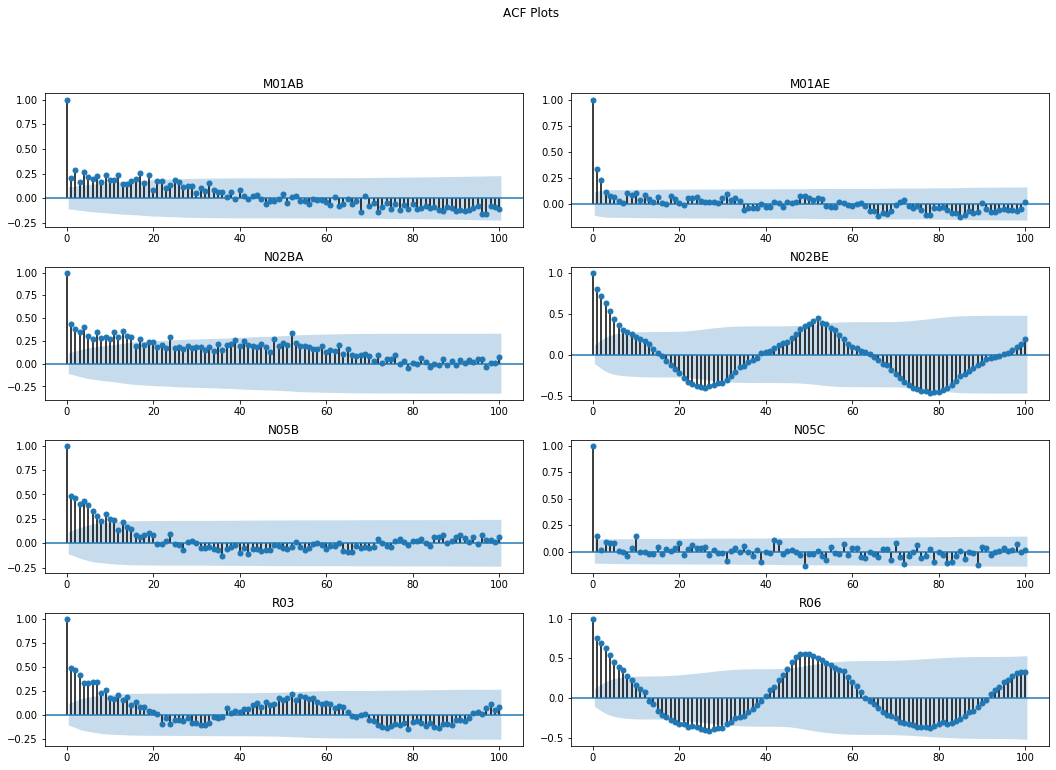

In [19]:
import math
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

subplotindex=0
numrows = 4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.suptitle("ACF Plots")
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in d_codes:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        
        plot_acf(df_weekly[x], lags=100, title=x, ax=ax[rowindex,colindex])
  
        subplotindex=subplotindex+1

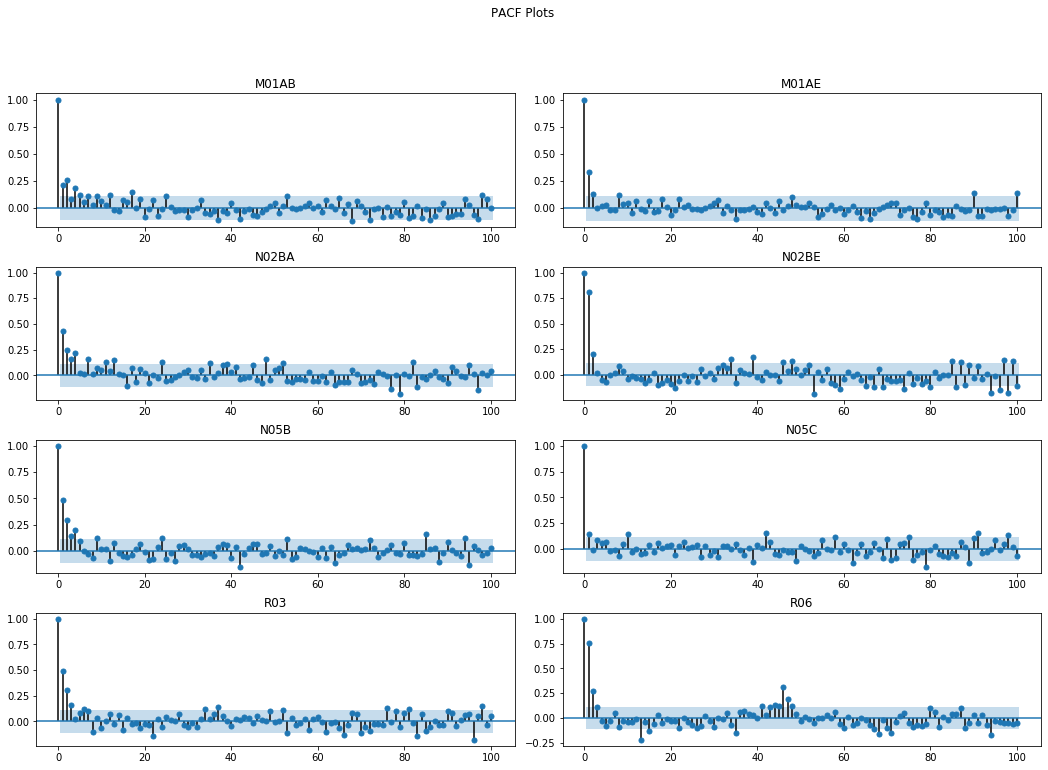

In [20]:
subplotindex=0
numrows = 4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.suptitle("PACF Plots")
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in d_codes:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        
        plot_pacf(df_weekly[x], lags=100, title=x, ax=ax[rowindex,colindex])
  
        subplotindex=subplotindex+1

Minor autocorrelation is observed at ACF (Auto-Correlation Function) and PACF (Partial Auto-Correlation Function) plots for all series, with exception of N05C sales. N02BE, R03 and R06 series were found to exhibit annual seasonality

In [21]:
df_weekly.shape

(302, 9)

In [22]:
df_weekly.head()

datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0   1/5/2014  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1  1/12/2014  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2  1/19/2014  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3  1/26/2014  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
4   2/2/2014  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0

In [23]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   302 non-null    object 
 1   M01AB   302 non-null    float64
 2   M01AE   302 non-null    float64
 3   N02BA   302 non-null    float64
 4   N02BE   302 non-null    float64
 5   N05B    302 non-null    float64
 6   N05C    302 non-null    float64
 7   R03     302 non-null    float64
 8   R06     302 non-null    float64
dtypes: float64(8), object(1)
memory usage: 21.4+ KB


In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [25]:
results_df = pd.DataFrame()

In [37]:
# Auto-Arima
import pmdarima as pm 

def seasonal_model(x,df):

    subplotindex=0
    numrows=1
    numcols=1
    fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
    plt.subplots_adjust(wspace=0.1, hspace=0.3)

    warnings.filterwarnings("ignore")

    #seasonal = ["N02BA","N02BE"]

    #for x in seasonal:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
        #if (x=='N02BA' or x=='N02BE' or x=='R03' or x=='R06'):
        model = pm.auto_arima(X, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                   start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                   trace=False,
                   error_action='ignore',
                   suppress_warnings=True, 
                   stepwise=True)
#         else:
#             model = pm.auto_arima(X, start_p=1, start_q=1,
#                            max_p=5, max_q=5, max_d=1,
#                            trace=False, seasonal=False,
#                            error_action='ignore',
#                            suppress_warnings=True, 
#                            stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)
    #resultsRollingdf.loc['AutoARIMA MSE',x]=error
    #resultsRollingdf.loc['AutoARIMA MAPE',x]=perror
    results_df.loc["AutoARIMA MSE",x] = error
    results_df.loc["AutoARIMA MAPE",x] = mape
#     ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(mape,2)) +'%)')
#     ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
#     ax[rowindex,colindex].plot(test)
#     ax[rowindex,colindex].plot(predictions, color='red')
    plt.title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(mape,2)) +'%)')
    plt.legend(['Real', 'Predicted'], loc='upper left')
    plt.plot(test)
    plt.plot(predictions, color='red')
    #subplotindex=subplotindex+1
    plt.show()

In [ ]:
seasonal_model("N02BA",df_weekly)

In [ ]:
# Auto-Arima
import pmdarima as pm 

subplotindex=0
numrows=1
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

seasonal = ["R03","R06"]

for x in seasonal:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df_weekly[x].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
        #if (x=='N02BA' or x=='N02BE' or x=='R03' or x=='R06'):
        model = pm.auto_arima(X, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                   start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                   trace=False,
                   error_action='ignore',
                   suppress_warnings=True, 
                   stepwise=True)
#         else:
#             model = pm.auto_arima(X, start_p=1, start_q=1,
#                            max_p=5, max_q=5, max_d=1,
#                            trace=False, seasonal=False,
#                            error_action='ignore',
#                            suppress_warnings=True, 
#                            stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)
    #resultsRollingdf.loc['AutoARIMA MSE',x]=error
    #resultsRollingdf.loc['AutoARIMA MAPE',x]=perror
    results_df.loc["AutoARIMA MSE",x] = error
    results_df.loc["AutoARIMA MAPE",x] = mape
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(mape,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

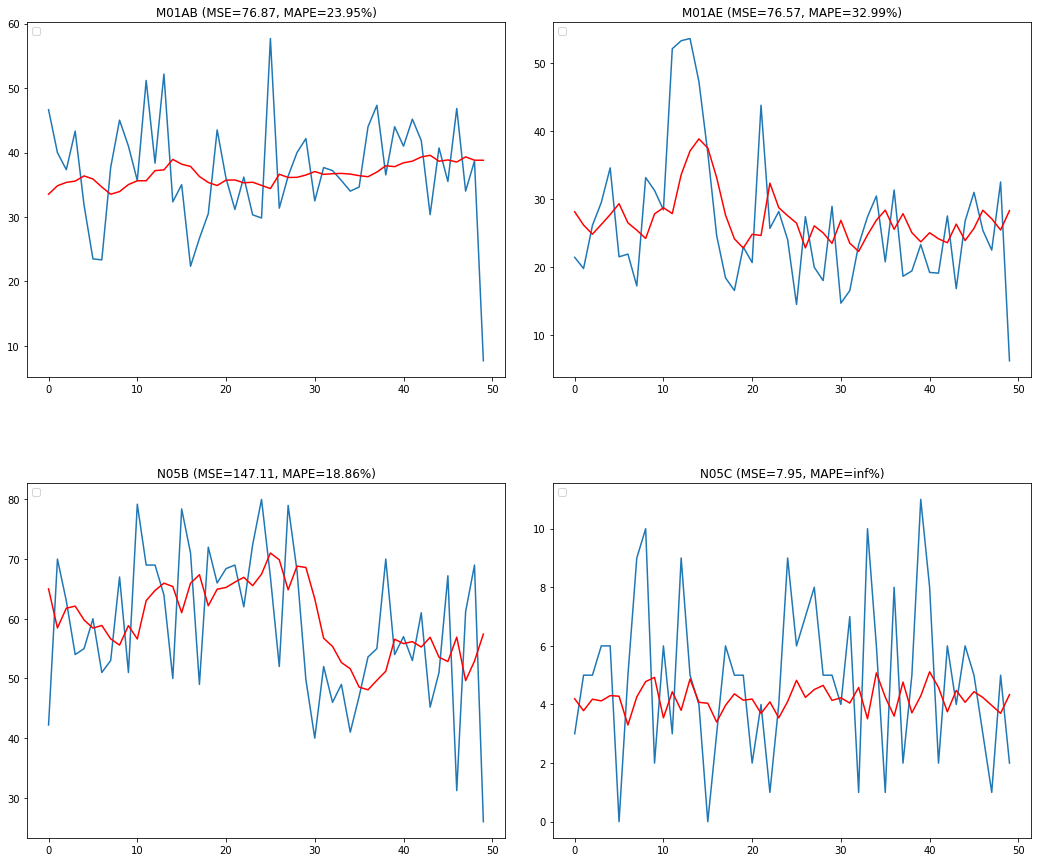

In [29]:
import pmdarima as pm 

subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

non_seasonal = ['M01AB','M01AE','N05B','N05C']

for x in non_seasonal:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df_weekly[x].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
#         if (x=='N02BA' or x=='N02BE' or x=='R03' or x=='R06'):
#             model = pm.auto_arima(X, start_p=1, start_q=1,
#                        max_p=5, max_q=5, m=52, max_d=1, max_D=1,
#                        start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
#                        trace=False,
#                        error_action='ignore',
#                        suppress_warnings=True, 
#                        stepwise=True)
#         else:
        model = pm.auto_arima(X, start_p=1, start_q=1,
                       max_p=5, max_q=5, max_d=1,
                       trace=False, seasonal=False,
                       error_action='ignore',
                       suppress_warnings=True, 
                       stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)
    #resultsRollingdf.loc['AutoARIMA MSE',x]=error
    #resultsRollingdf.loc['AutoARIMA MAPE',x]=perror
    results_df.loc["AutoARIMA MSE",x] = error
    results_df.loc["AutoARIMA MAPE",x] = mape
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(mape,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

In [31]:
results_df.head()

M01AB      M01AE        N05B      N05C
AutoARIMA MSE   76.873387  76.568961  147.113406  7.949826
AutoARIMA MAPE  23.951630  32.989525   18.864135       inf

#### Prophet

In [41]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()

In [44]:
for code in d_codes:
    py.iplot([go.Scatter(
        x=df_weekly.index,
        y=df_weekly[code]
    )])

In [45]:
from fbprophet import Prophet


In [47]:
?Prophet

Grid search for Prophet parameters

In [48]:
from sklearn.model_selection import ParameterGrid

M01AB= {
    'series':'M01AB',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[10,30,50],
               'interval_width':[0.0005]
              }
}
M01AE= {
    'series':'M01AE',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.01,0.05,0.1],
               'interval_width':[0.0005]
              }
}
N02BA= {
    'series':'N02BA',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.005,0.01,0.05,0.1],
                   'interval_width':[0.0005]
              }
}
N02BE= {
    'series':'N02BE',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[5,10,50],'seasonality_prior_scale':[150,170,200],
               'interval_width':[0.0005]
              }
}
N05B= {
    'series':'N05B',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[1,5,10],
               'interval_width':[0.0005]
              }
}
N05C= {
    'series':'N05C',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.05,0.08,0.1,0.5],
               'interval_width':[0.0005]
              }
}
R03= {
    'series':'R03',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.01,0.05,0.1],'seasonality_prior_scale':[120,160,200],
               'interval_width':[0.0005]
              }
}
R06= {
    'series':'R06',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.01,0.05,0.1],'seasonality_prior_scale':[100,120,160,200],
               'interval_width':[0.0005]
              }
}

In [76]:
df_weekly = pd.read_csv("../data/archive 2/salesweekly.csv")

drugs = [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]

for code in drugs:
    df_p = df_weekly[['datum',code['series']]]
    df_p = df_p.rename(columns={'datum':'ds',code['series']:'y'})
    
    size = int(len(df_p) - 50)
    
    train_df_p = df_p.loc[0:size,:]
    test_df_p = df_p.loc[size+1:len(df_p),:]
    min_error = 0
    min_p = 0
    
    grid = ParameterGrid(code['params_grid'])
    for p in grid:
        model = Prophet(**p, daily_seasonality=False, weekly_seasonality=False)
        if(code['series']=='N02BE' or code['series']=='R03' or code['series']=='R06'):
            model=model.add_seasonality(
                                name='yearly',
                                period=365.25,
                                fourier_order=13)
        model_fit = model.fit(train_df_p)
        future = model.make_future_dataframe(periods=50, freq='W')
        output = model.predict(future)
        predictions=output.loc[size+2:len(df_p),:]['yhat'].values
        error = mean_squared_error(test_df_p['y'], predictions)
        if(min_error > 0):
            if(error < min_error):
                min_error = error
                min_p = p
        else:
            min_error = error
            min_p = p
    
    warnings.filterwarnings("ignore")

        
    print('Test MSE: ('+code['series']+'): %.3f' % min_error)
    print(min_p)
        

Test MSE: (M01AB): 69.916
{'changepoint_prior_scale': 30, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE: (M01AE): 79.501
{'changepoint_prior_scale': 0.05, 'growth': 'linear', 'interval_width': 0.0005}


INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.


Test MSE: (N02BA): 32.221
{'changepoint_prior_scale': 0.005, 'growth': 'linear', 'interval_width': 0.0005}


INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.


Test MSE: (N02BE): 3070.259
{'changepoint_prior_scale': 10, 'growth': 'linear', 'interval_width': 0.0005, 'seasonality_prior_scale': 200}
Test MSE: (N05B): 302.415
{'changepoint_prior_scale': 5, 'growth': 'linear', 'interval_width': 0.0005}


INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.


Test MSE: (N05C): 8.369
{'changepoint_prior_scale': 0.5, 'growth': 'linear', 'interval_width': 0.0005}


INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.


Test MSE: (R03): 837.152
{'changepoint_prior_scale': 0.05, 'growth': 'linear', 'interval_width': 0.0005, 'seasonality_prior_scale': 160}


INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom se

Test MSE: (R06): 76.725
{'changepoint_prior_scale': 0.05, 'growth': 'linear', 'interval_width': 0.0005, 'seasonality_prior_scale': 120}


Forecasting with Prophet

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.


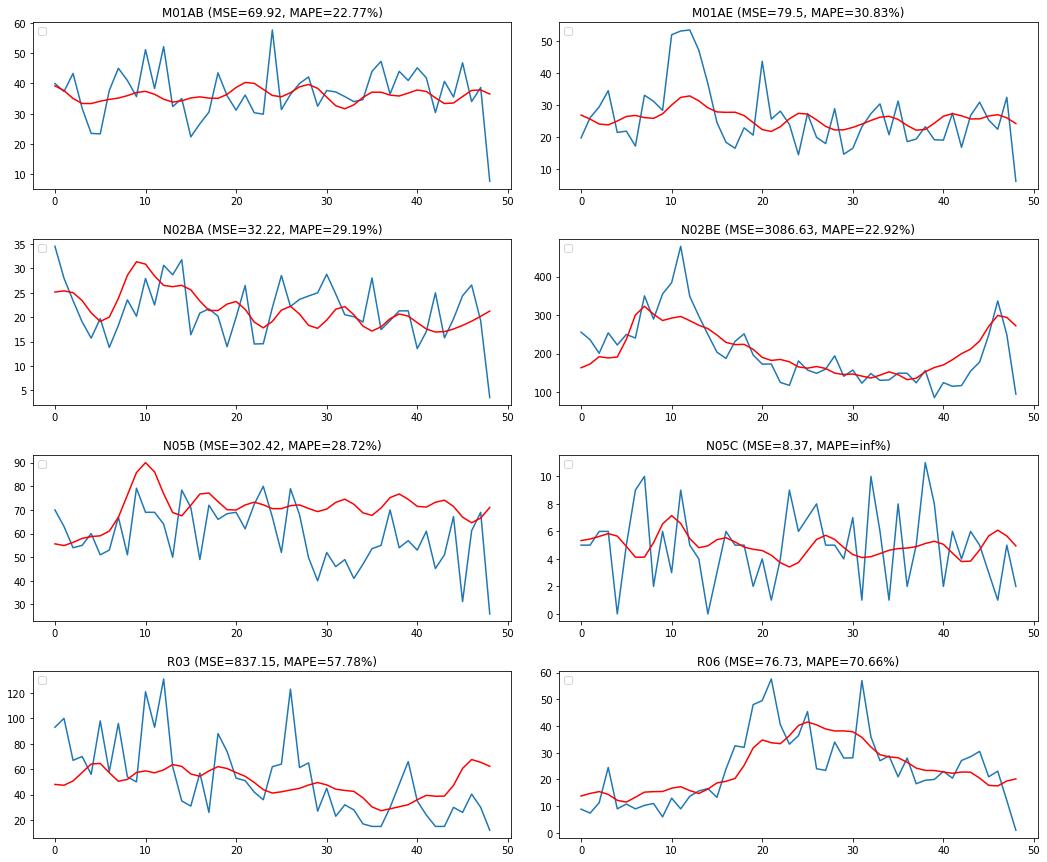

In [85]:

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

M01AB= {'series':'M01AB','params_grid':{'changepoint_prior_scale':30,'interval_width':0.0005}}
M01AE= {'series':'M01AE','params_grid':{'changepoint_prior_scale':0.05,'interval_width':0.0005}}
N02BA= {'series':'N02BA','params_grid':{'changepoint_prior_scale':0.005,'interval_width':0.0005}}
N02BE= {'series':'N02BE','params_grid':{'changepoint_prior_scale':10,'seasonality_prior_scale':170,'interval_width':0.0005}}
N05B= {'series':'N05B','params_grid':{'changepoint_prior_scale':5,'interval_width':0.0005}}
N05C= {'series':'N05C','params_grid':{'changepoint_prior_scale':0.5,'interval_width':0.005}}
R03= {'series':'R03','params_grid':{'changepoint_prior_scale':0.05,'seasonality_prior_scale':160,'interval_width':0.0005}}
R06= {'series':'R06','params_grid':{'changepoint_prior_scale':0.05,'seasonality_prior_scale':120,'interval_width':0.0005}}

r=[M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]

for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    df_p=df_weekly[['datum',x['series']]]
    df_p = df_p.rename(columns={'datum': 'ds', x['series']: 'y'})
    size = int(len(df_p) - 50)
    train_df_p=df_p.loc[0:size,:]
    test_df_p=df_p.loc[size+1:len(df_p),:]
    predictions = list()
    model = Prophet(changepoint_prior_scale=x['params_grid']['changepoint_prior_scale'],
                              growth='linear', interval_width=x['params_grid']['interval_width'], 
                              daily_seasonality=False, 
                              weekly_seasonality=False
                           )
    if(x['series']=='N02BE' or x['series']=='R03' or x['series']=='R06'):
        model=model.add_seasonality(
                                name='yearly',
                                period=365.25,
                                prior_scale=x['params_grid']['seasonality_prior_scale'],
                                fourier_order=13)
    model_fit = model.fit(train_df_p)
    future = model.make_future_dataframe(periods=50, freq='W')
    output = model.predict(future)
    predictions=output.loc[size+2:len(df_p),:]['yhat'].values
    
    error = mean_squared_error(test_df_p['y'].values, predictions)
    perror = mean_absolute_percentage_error(test_df_p['y'].values, predictions)
    results_df.loc['Prophet MSE',x['series']]=error
    results_df.loc['Prophet MAPE',x['series']]=perror
    ax[rowindex,colindex].set_title(x['series']+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test_df_p['y'].values)
    #model_fit.plot(output, ax = ax)


    ax[rowindex,colindex].plot(predictions, color='red')
    
    subplotindex=subplotindex+1
plt.show()

LSTM

In [86]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend.


In [93]:
from numpy import array

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


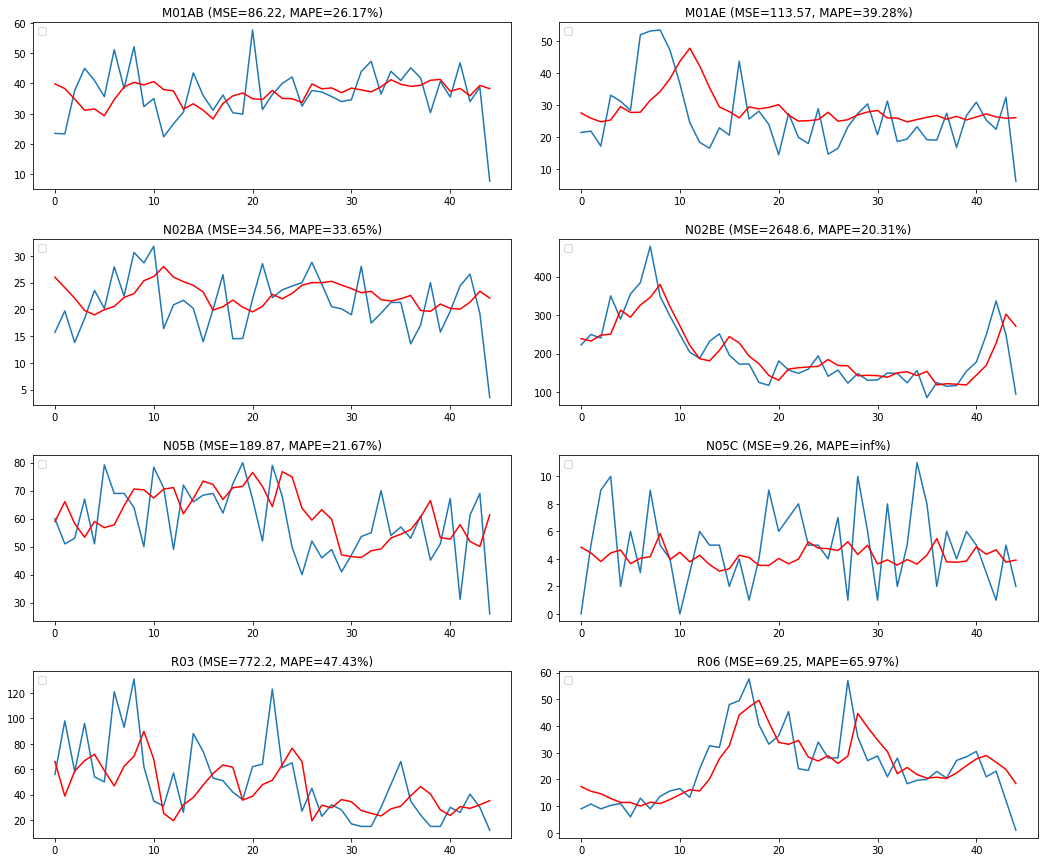

In [95]:
size = int(len(df_weekly) - 50)
#print(size)
n_steps=5
n_features = 1

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

                        
for x in d_codes:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df_weekly[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df_weekly)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    results_df.loc['Vanilla LSTM MSE',x]=error
    results_df.loc['Vanilla LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

Stacked LSTM

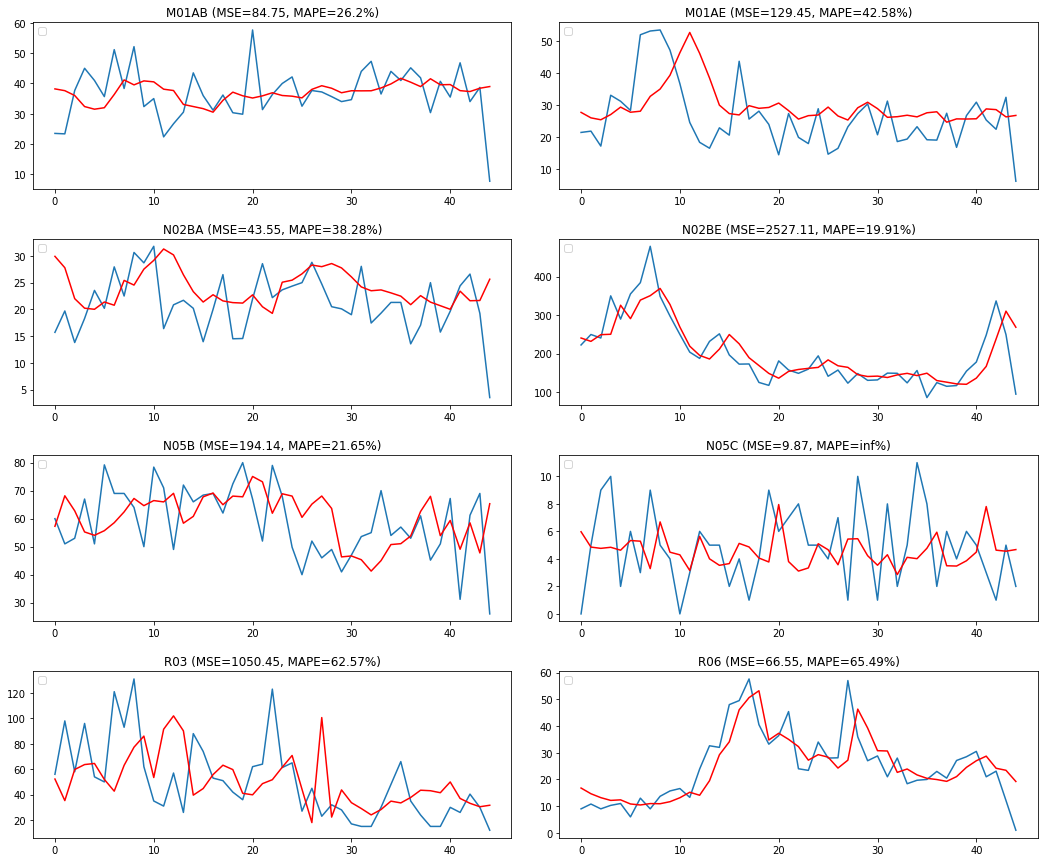

In [97]:

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df_weekly[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df_weekly)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)
    
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    results_df.loc['Stacked LSTM MSE',x]=error
    results_df.loc['Stacked LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

Stacked LSTM with n_steps = 10

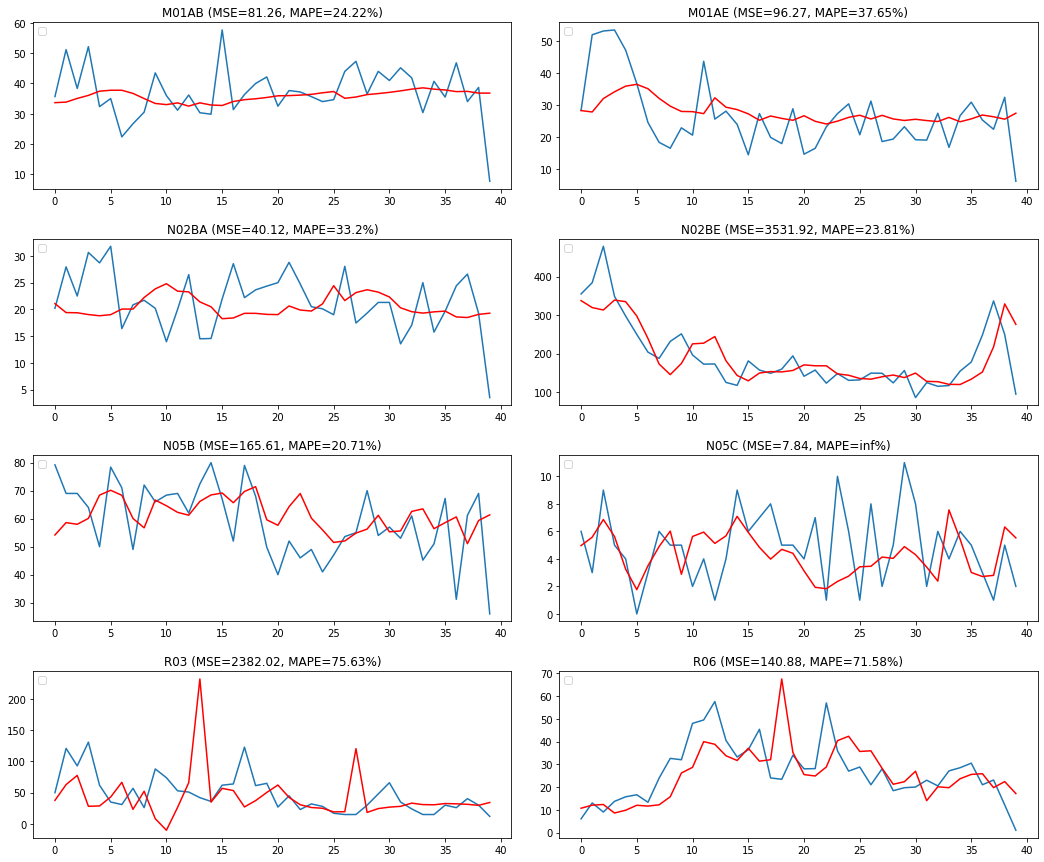

In [99]:
n_steps = 10
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df_weekly[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df_weekly)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)
    
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    results_df.loc['Stacked LSTM_10 MSE',x]=error
    results_df.loc['Stacked LSTM_10 MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

In [101]:
results_df.head(12)

M01AB       M01AE        N05B      N05C      N02BA  \
AutoARIMA MSE         76.873387   76.568961  147.113406  7.949826        NaN   
AutoARIMA MAPE        23.951630   32.989525   18.864135       inf        NaN   
Prophet MSE           69.915958   79.500771  302.415466  8.368612  32.221291   
Prophet MAPE          22.765390   30.829054   28.722432       inf  29.190174   
Vanilla LSTM MSE      86.216074  113.567065  189.870209  9.260156  34.561746   
Vanilla LSTM MAPE     26.174878   39.284351   21.670067       inf  33.652885   
Stacked LSTM MSE      84.746066  129.451872  194.140147  9.869463  43.549373   
Stacked LSTM MAPE     26.203508   42.581608   21.653873       inf  38.284768   
Stacked LSTM_10 MSE   81.257987   96.268429  165.608789  7.837057  40.122865   
Stacked LSTM_10 MAPE  24.218145   37.645741   20.706543       inf  33.201787   

                            N02BE          R03         R06  
AutoARIMA MSE                 NaN          NaN         NaN  
AutoARIMA MAPE                NaN          NaN         NaN  
Prophet MSE           3086.625076   837.152147   76.725048  
Prophet MAPE            22.920435    57.784190   70.662204  
Vanilla LSTM MSE      2648.604863   772.198081   69.250385  
Vanilla LSTM MAPE       20.310438    47.428661   65.970942  
Stacked LSTM MSE      2527.108303  1050.452080   66.550604  
Stacked LSTM MAPE       19.908582    62.566571   65.486847  
Stacked LSTM_10 MSE   3531.922903  2382.021501  140.884109  
Stacked LSTM_10 MAPE    23.813424    75.632028   71.584920

Prophet seems to have shown reasonably good performance. LSTM with 5 steps seemed to have performed better than that with 10 steps.          

AUTO_ARIMA with seasonality=TRUE took too long to run. So, there are NAN values for drugs with seasonality for ARIMA.

#### Let's work on forecasting Analgesics using ML models

In [102]:
analgesics_df = df_daily[drug_codes['Analgesics']].copy()
analgesics_df = analgesics_df.set_index(df_daily.index)
#analgesics_df['Weekday Name'] = df['Weekday Name']

In [103]:
analgesics_df.head()

N02BA  N02BE
datum                   
2014-01-02    3.4  32.40
2014-01-03    4.4  50.60
2014-01-04    6.5  61.85
2014-01-05    7.0  41.10
2014-01-06    4.5  21.70

In [104]:
analgesics_df['n02b_sales'] = analgesics_df['N02BA'] + analgesics_df['N02BE']

analgesics_df = analgesics_df.drop(columns=['N02BA', 'N02BE'])

In [105]:
analgesics_df.head()

n02b_sales
datum                 
2014-01-02       35.80
2014-01-03       55.00
2014-01-04       68.35
2014-01-05       48.10
2014-01-06       26.20

In [106]:
analgesics_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   n02b_sales  2106 non-null   float64
dtypes: float64(1)
memory usage: 32.9 KB


In [107]:
analgesics_df.shape

(2106, 1)

In [108]:
#split data for 2 independent groups. The first one we will use to training models and second one as test
train_data = analgesics_df['01/01/2017':'04/30/2019'].copy()
test_data = analgesics_df['05/1/2019':].copy()

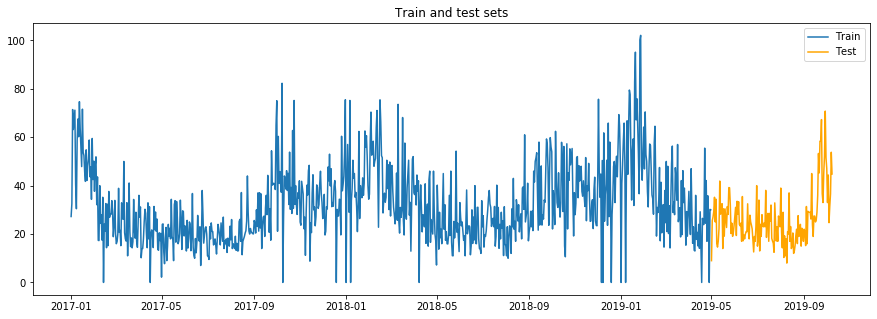

In [109]:
plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['n02b_sales'], label='Train')
plt.plot(test_data.index, test_data['n02b_sales'], color='orange', label='Test')
plt.legend()
plt.title('Train and test sets')
plt.show()

In [110]:
from scipy import stats
from scipy.special import inv_boxcox

# transform training data & save lambda value
train, fitted_lambda = stats.boxcox(train_data['n02b_sales'] + 1) #add 1 to handle zero values
df_train = pd.DataFrame(train, index=train_data.index, columns=['n02b_sales'])


# use lambda value to transform test data
test = stats.boxcox(test_data['n02b_sales'], fitted_lambda)
df_test = pd.DataFrame(test, index=test_data.index, columns=['n02b_sales'])

In [111]:
train_data.shape

(850, 1)

In [112]:
test_data.shape

(161, 1)

In [113]:
train_data.head()

n02b_sales
datum                 
2017-01-01   27.237500
2017-01-02   32.625000
2017-01-03   71.437500
2017-01-04   63.183333
2017-01-05   67.416667

In [114]:
df_train.shape

(850, 1)

Text(0.5, 0.98, 'Transformed data')

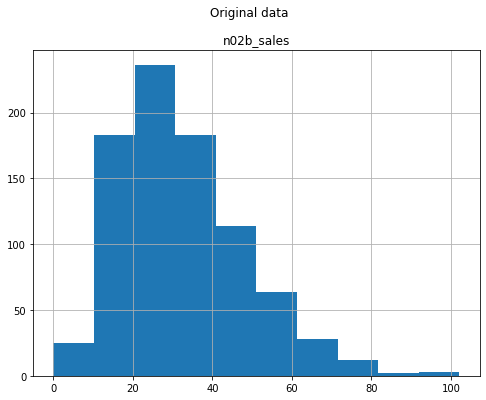

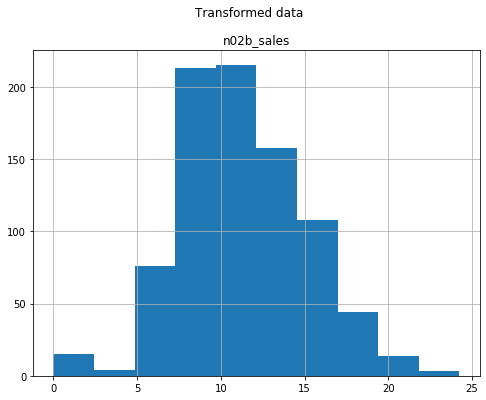

In [141]:
plt.rcParams["figure.figsize"] = (8,6)
train_data.hist()
plt.suptitle("Original data")
df_train.hist()
plt.suptitle("Transformed data")

In [116]:
#Add lags
import numpy as np

def add_lags(X_data, lags):
    X = pd.DataFrame(X_data.values.ravel(), index=X_data.index, columns=[['y']])
    
    for window in lags:
        X['shift_{}'.format(window)] = X['y'].shift(window)
        X['diff_{}'.format(window)] = X['y'].shift(1).diff(window)
        X['rolling_mean_{}'.format(window)] = X['y'].shift(1).rolling(window=window).mean()
        X['rolling_max_{}'.format(window)] = X['y'].shift(1).rolling(window=window).max()
        X['rolling_std_{}'.format(window)] = X['y'].shift(1).rolling(window=window).std()
        X['rolling_min_{}'.format(window)] = X['y'].shift(1).rolling(window=window).min()

    X = X.fillna(np.nanmedian(X))
    return X.drop('y', axis=1)


In [117]:
#Scale data
from sklearn.preprocessing import MinMaxScaler
def scaler(data):    
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    result = pd.DataFrame(scaled, columns=[data.columns], index=data.index)
    
    return result



In [118]:
#Add weekday feature
def add_weekday_feature(X):
    data = pd.DataFrame({'day_of_week' : X.index.weekday}, X.index)
    days = pd.get_dummies(data['day_of_week'])
    result = pd.concat([X, days], axis=1, sort=False)
    
    return result


In [119]:
lags = [2,7,14,30]

X_train = scaler(add_weekday_feature(add_lags(df_train,lags)))


In [120]:
X_train.shape

(850, 31)

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 850 entries, 2017-01-01 to 2019-04-30
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ((shift_2,),)          850 non-null    float64
 1   ((diff_2,),)           850 non-null    float64
 2   ((rolling_mean_2,),)   850 non-null    float64
 3   ((rolling_max_2,),)    850 non-null    float64
 4   ((rolling_std_2,),)    850 non-null    float64
 5   ((rolling_min_2,),)    850 non-null    float64
 6   ((shift_7,),)          850 non-null    float64
 7   ((diff_7,),)           850 non-null    float64
 8   ((rolling_mean_7,),)   850 non-null    float64
 9   ((rolling_max_7,),)    850 non-null    float64
 10  ((rolling_std_7,),)    850 non-null    float64
 11  ((rolling_min_7,),)    850 non-null    float64
 12  ((shift_14,),)         850 non-null    float64
 13  ((diff_14,),)          850 non-null    float64
 14  ((rolling_mean_14,),)  850 non-null    

In [122]:
X_train.head()

(shift_2,) (diff_2,) (rolling_mean_2,) (rolling_max_2,)  \
datum                                                                
2017-01-01   0.354410  0.730012          0.248997         0.159186   
2017-01-02   0.354410  0.730012          0.248997         0.159186   
2017-01-03   0.429785  0.730012          0.369189         0.327722   
2017-01-04   0.483815  0.740061          0.586201         0.738904   
2017-01-05   0.799527  0.665533          0.736471         0.738904   

           (rolling_std_2,) (rolling_min_2,) (shift_7,) (diff_7,)  \
datum                                                               
2017-01-01         0.573500         0.358581    0.35441  0.744826   
2017-01-02         0.573500         0.358581    0.35441  0.744826   
2017-01-03         0.061823         0.434843    0.35441  0.744826   
2017-01-04         0.361247         0.489510    0.35441  0.744826   
2017-01-05         0.068293         0.748551    0.35441  0.744826   

           (rolling_mean_7,) (rolling_max_7,)  ... (rolling_max_30,)  \
datum                                          ...                     
2017-01-01          0.143831         0.037015  ...               0.0   
2017-01-02          0.143831         0.037015  ...               0.0   
2017-01-03          0.143831         0.037015  ...               0.0   
2017-01-04          0.143831         0.037015  ...               0.0   
2017-01-05          0.143831         0.037015  ...               0.0   

           (rolling_std_30,) (rolling_min_30,)    0    1    2    3    4    5  \
datum                                                                          
2017-01-01               1.0          0.754232  0.0  0.0  0.0  0.0  0.0  0.0   
2017-01-02               1.0          0.754232  1.0  0.0  0.0  0.0  0.0  0.0   
2017-01-03               1.0          0.754232  0.0  1.0  0.0  0.0  0.0  0.0   
2017-01-04               1.0          0.754232  0.0  0.0  1.0  0.0  0.0  0.0   
2017-01-05               1.0          0.754232  0.0  0.0  0.0  1.0  0.0  0.0   

              6  
datum            
2017-01-01  1.0  
2017-01-02  0.0  
2017-01-03  0.0  
2017-01-04  0.0  
2017-01-05  0.0  

[5 rows x 31 columns]

In [123]:
from sklearn.model_selection import TimeSeriesSplit

def train(X, actual, model, n_splits=10):
    
    'trains models and apply cross-validation for the time series data'
    
    cv = TimeSeriesSplit(n_splits=n_splits)
    y = []
    i = 0 

    for train, test in cv.split(X):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = actual[train], actual[test]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        #print(y_pred)
        if i == 0:
            y.extend(model.predict(X_train))
        i+=1
        y.extend(y_pred)
        
    return y

In [124]:
df_train.shape

(850, 1)

In [125]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_ridge = Ridge()
model_lasso = Lasso()
model_tree = DecisionTreeRegressor()
model_forest = RandomForestRegressor()
models = {'forest': model_forest,
          'lasso': model_lasso,
          'ridge': model_ridge,
          'tree': model_tree}

In [126]:
df = pd.DataFrame()
for model in models.items():
    df[model[0]] = train(X_train, df_train.values.ravel(), model[1])    

In [127]:
df[model[0]]

0      10.416649
1      11.726171
2      19.378057
3      17.931484
4      18.682395
         ...    
845    11.340950
846    10.855570
847    12.915649
848    11.148343
849     9.579772
Name: tree, Length: 850, dtype: float64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   forest  850 non-null    float64
 1   lasso   850 non-null    float64
 2   ridge   850 non-null    float64
 3   tree    850 non-null    float64
dtypes: float64(4)
memory usage: 26.7 KB


In [129]:
from sklearn.metrics import mean_absolute_error
def model_to_chart(y, y_pred, model_name, index):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(15,5))
    ax.set_title('Model:{}, MAE = {:.3f}'.format(model_name, mean_absolute_error(y, y_pred)))
    plt.plot(index, y, label='True')
    plt.plot(index, y_pred, label='Predicted')
    plt.plot(index, y - y_pred, label='error', alpha=.3)
    plt.legend()
    

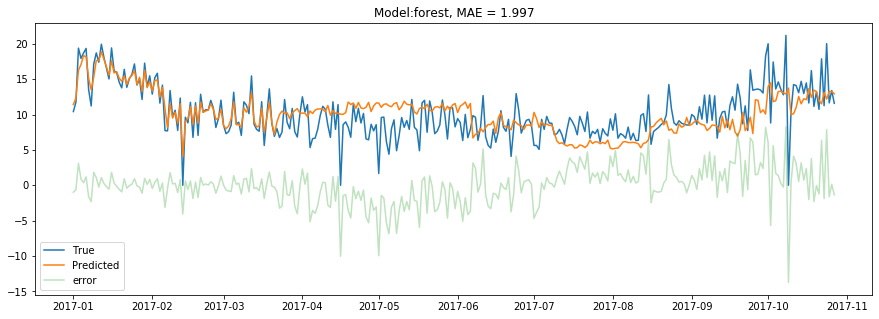

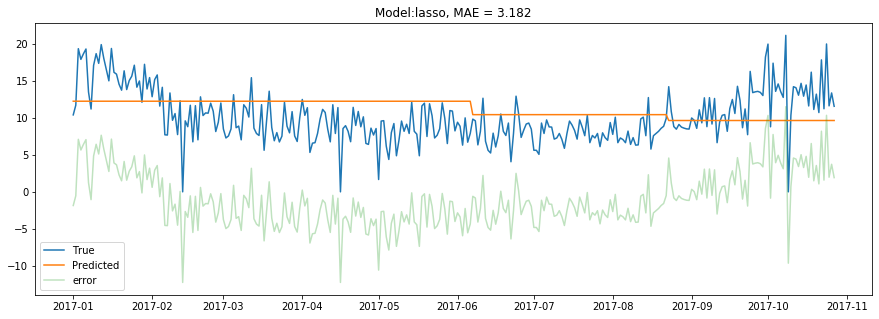

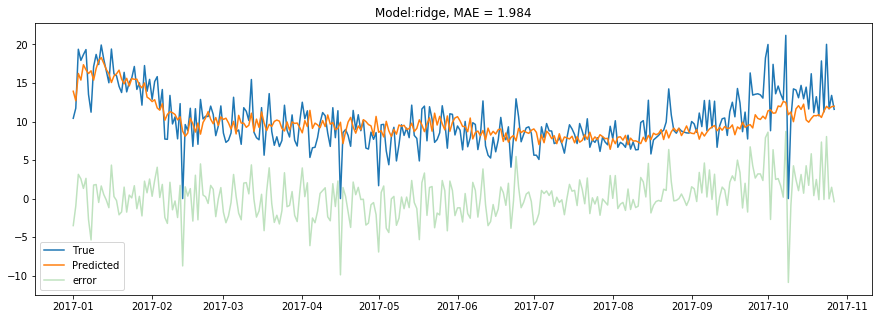

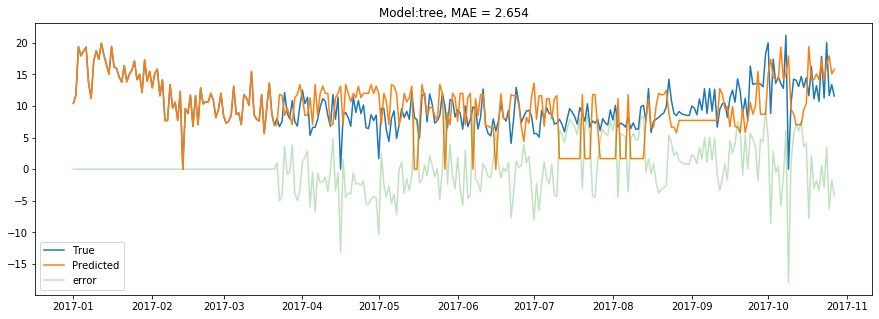

In [130]:
for model in models.items():
    model_to_chart(y=df_train[:300].values.ravel(), 
                y_pred= df[:300][model[0]].values, 
                index = df_train[:300].index, 
                model_name=model[0])

Forecasting on Test

In [131]:
def create_dates(data, n_steps_prediction):
    
    'creates 1 time step from the latest date'
    
    start_date = data.index[-1] + pd.DateOffset(1) #defines the latest date
    #print(start_date)
    new_date = pd.date_range(start_date, periods=n_steps_prediction) #create dataset with dates
    #print(new_date)
    return data.append(pd.DataFrame(index=new_date), sort=True) #add new values to the dateset



In [132]:
def forecaster(models, data, n_steps, lags_list):
    
    'predicts new values on the base of already predicted'
    df = create_dates(data, n_steps) #this line creates new dates
    #print(df)
    for model in models.items(): #iterate over the models
        
        df[model[0]] = df.values[:,0] #provide original values to generate initial features


        for i in range(0, n_steps-1):
            x_features = scaler(add_weekday_feature(add_lags(df[model[0]], lags_list))) #here we generate predictors and scale them
            #print(-n_steps+i,-n_steps+i+1)
            #print(model[1].predict(x_features.iloc[-n_steps+i:-n_steps+i+1]))
            y_pred = np.round(model[1].predict(x_features.iloc[-n_steps+i:-n_steps+i+1]), 2) #predict new value
            
            df[model[0]].iloc[-n_steps+i] = y_pred #this line adds predicted value into the end of dataset for the specific model
        
    return df

In [134]:
lags = [2,7,14,30]

predicted_values = forecaster(models = models, data=train_data[-14:], n_steps=30, lags_list=lags)

In [135]:
predicted_values

n02b_sales  forest  lasso  ridge   tree
2019-04-17       14.75   14.75  14.75  14.75  14.75
2019-04-18        0.00    0.00   0.00   0.00   0.00
2019-04-19       26.50   26.50  26.50  26.50  26.50
2019-04-20       23.90   23.90  23.90  23.90  23.90
2019-04-21       24.00   24.00  24.00  24.00  24.00
2019-04-22       55.50   55.50  55.50  55.50  55.50
2019-04-23       24.50   24.50  24.50  24.50  24.50
2019-04-24       42.10   42.10  42.10  42.10  42.10
2019-04-25       17.00   17.00  17.00  17.00  17.00
2019-04-26       35.85   35.85  35.85  35.85  35.85
2019-04-27       28.30   28.30  28.30  28.30  28.30
2019-04-28        0.00    0.00   0.00   0.00   0.00
2019-04-29       30.20   30.20  30.20  30.20  30.20
2019-04-30       30.00   30.00  30.00  30.00  30.00
2019-05-01         NaN    9.10  11.34   7.23   9.62
2019-05-02         NaN    8.08  11.34   6.19   9.84
2019-05-03         NaN    8.39  11.34   7.51   9.58
2019-05-04         NaN    8.29  11.34   8.63   9.58
2019-05-05         NaN    9.21  11.34   9.37   9.58
2019-05-06         NaN    8.74  11.34   7.67   9.58
2019-05-07         NaN    9.24  11.34   5.40   9.58
2019-05-08         NaN    8.74  11.34   6.43   9.58
2019-05-09         NaN    8.13  11.34   4.52   9.58
2019-05-10         NaN    8.49  11.34   5.33   9.58
2019-05-11         NaN    8.07  11.34   5.87   9.58
2019-05-12         NaN    8.69  11.34   5.61   9.58
2019-05-13         NaN    6.27  11.34   5.04   1.67
2019-05-14         NaN    8.44  11.34   5.12   9.58
2019-05-15         NaN    8.81  11.34   5.29   9.58
2019-05-16         NaN    6.36  11.34   5.36   1.67
2019-05-17         NaN   10.24  11.34   9.08  12.58
2019-05-18         NaN    9.45  11.34   9.61  12.58
2019-05-19         NaN   10.18  11.34  12.83  12.58
2019-05-20         NaN    9.68  11.34   8.46  12.58
2019-05-21         NaN    9.78  11.34   8.83  12.58
2019-05-22         NaN    9.82  11.34   9.63  13.52
2019-05-23         NaN    8.37  11.34   8.07   0.00
2019-05-24         NaN    8.86  11.34   9.95   4.16
2019-05-25         NaN    8.32  11.34   9.05  10.10
2019-05-26         NaN    9.11  11.34  10.59   8.03
2019-05-27         NaN    7.64  11.34   7.42   6.59
2019-05-28         NaN    8.27  11.34   7.34   6.65
2019-05-29         NaN    8.23  11.34   9.43   9.31
2019-05-30         NaN     NaN    NaN    NaN    NaN

In [136]:
predicted_values.drop(axis=1, columns='n02b_sales', inplace=True)

In [137]:
#Reverse box-cox transfomation
df_test = inv_boxcox(df_test, fitted_lambda)
predicted_values = inv_boxcox(predicted_values, fitted_lambda)

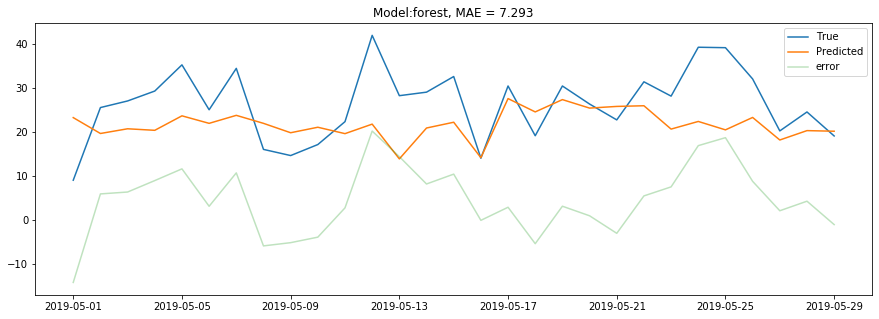

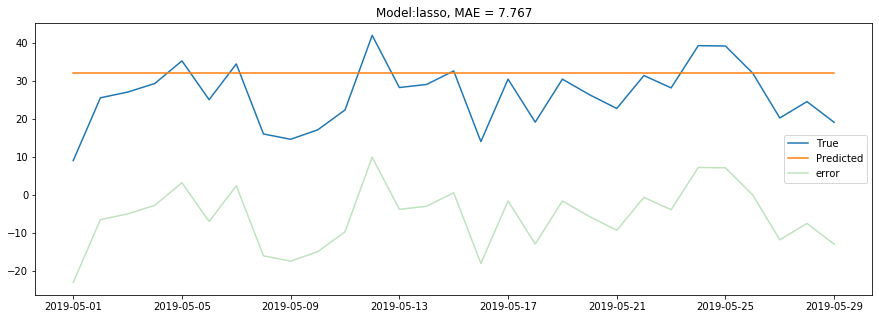

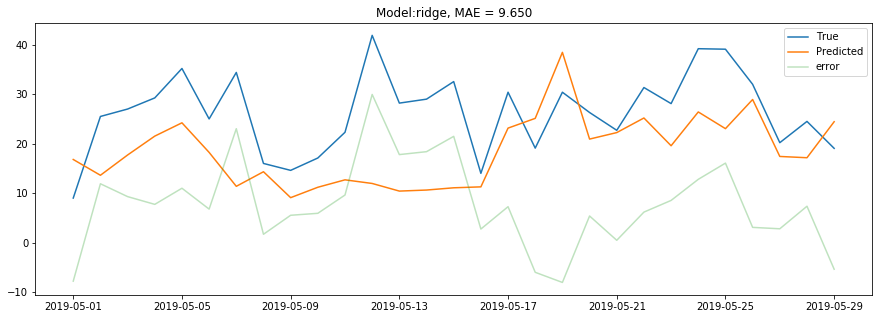

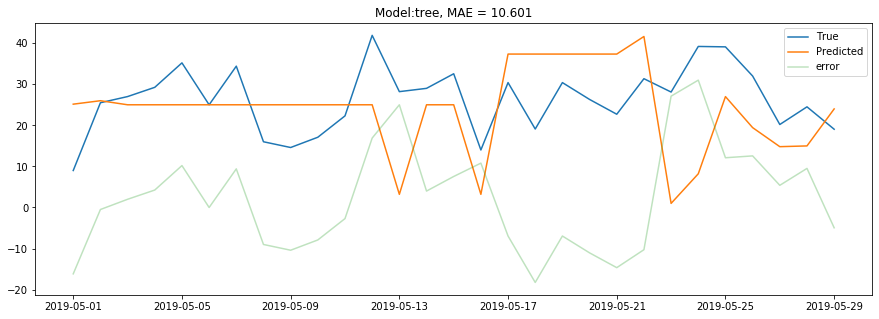

In [138]:
for model in models.items():
    model_to_chart(y=df_test.loc['2019-05-01':'2019-05-29'].values.ravel(), 
                y_pred= predicted_values.iloc[-30:-1][model[0]].values, 
                index = predicted_values.iloc[-30:-1].index, 
                model_name=model[0])